In [ ]:
# Import libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import files


In [ ]:
# Upload the CSV file
uploaded = files.upload()

# Get the uploaded file name
file_name = list(uploaded.keys())[0]


Saving Download Data - STOCK_US_XNAS_NFLX.csv to Download Data - STOCK_US_XNAS_NFLX.csv


In [ ]:
# Load the CSV data into a DataFrame
df = pd.read_csv(file_name)

# Display the first few rows of the DataFrame to understand the structure of the data
df.head()


,Date,Open,High,Low,Close,Volume
0,12/07/2023,450.85,452.89,448.32,452.00,"3,506,722"
1,12/06/2023,460.00,460.50,445.73,446.73,"4,178,755"
2,12/05/2023,450.70,456.39,449.58,455.15,"3,380,674"
3,12/04/2023,460.99,461.20,451.20,453.90,"5,157,713"
4,12/01/2023,473.17,475.23,464.60,465.74,"4,341,471"


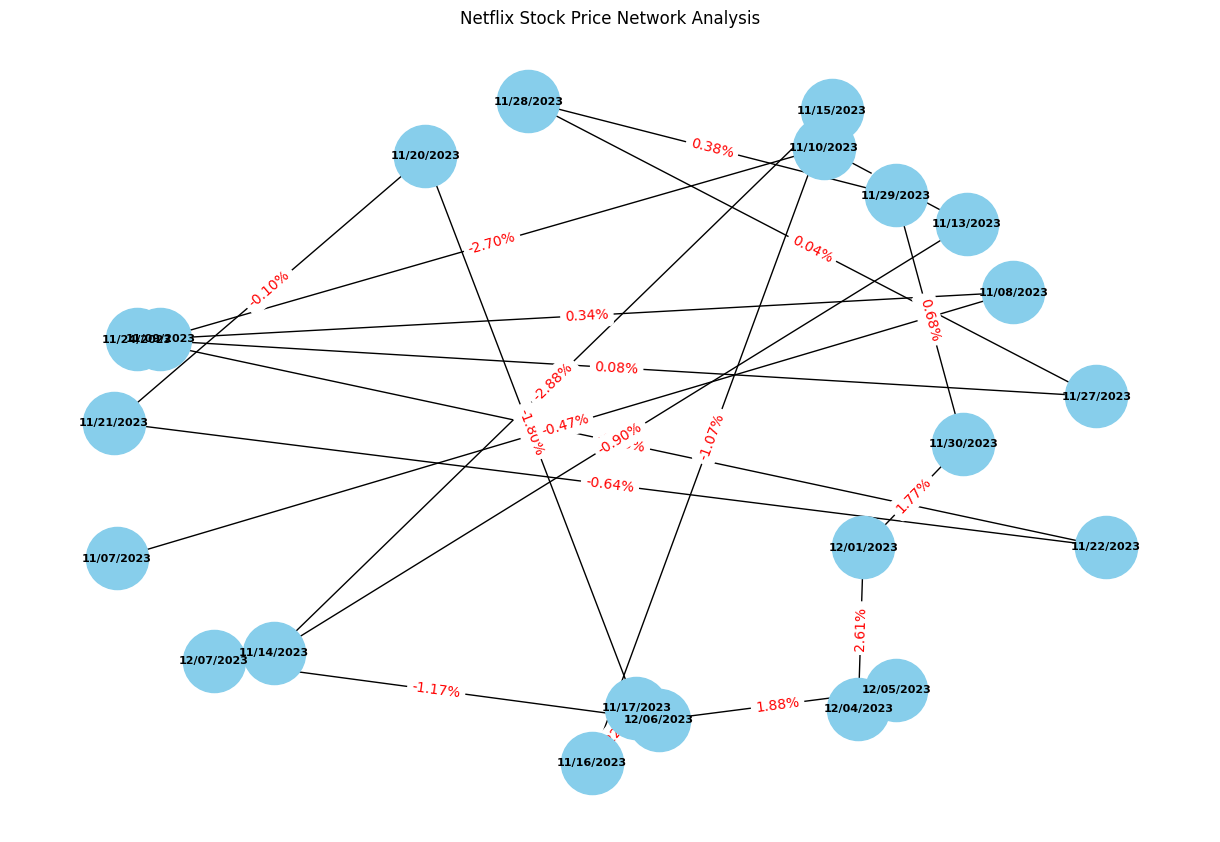

In [ ]:


# Create a graph using NetworkX
G = nx.Graph()

# Add nodes for each unique date in the DataFrame
nodes = df['Date'].unique()
G.add_nodes_from(nodes)


df['PriceChange'] = df['Close'].pct_change()
edges = list(zip(df['Date'][:-1], df['Date'][1:], df['PriceChange'][1:]))
G.add_weighted_edges_from(edges)

# Visualize the graph
pos = nx.spring_layout(G)  # You can use different layout algorithms
edge_labels = {(i, j): f"{weight:.2%}" for i, j, weight in edges}

plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=2000, node_color='skyblue', font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title('Netflix Stock Price Network Analysis')
plt.show()


In [ ]:
# Compute degree centrality
degree_centrality = nx.degree_centrality(G)

# Identify top nodes based on degree centrality
top_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:5]

print("Top 5 nodes based on degree centrality:")
for node in top_nodes:
    print(f"Node: {node}, Degree Centrality: {degree_centrality[node]:.4f}")


Top 5 nodes based on degree centrality:
Node: 12/06/2023, Degree Centrality: 0.0952
Node: 12/05/2023, Degree Centrality: 0.0952
Node: 12/04/2023, Degree Centrality: 0.0952
Node: 12/01/2023, Degree Centrality: 0.0952
Node: 11/30/2023, Degree Centrality: 0.0952


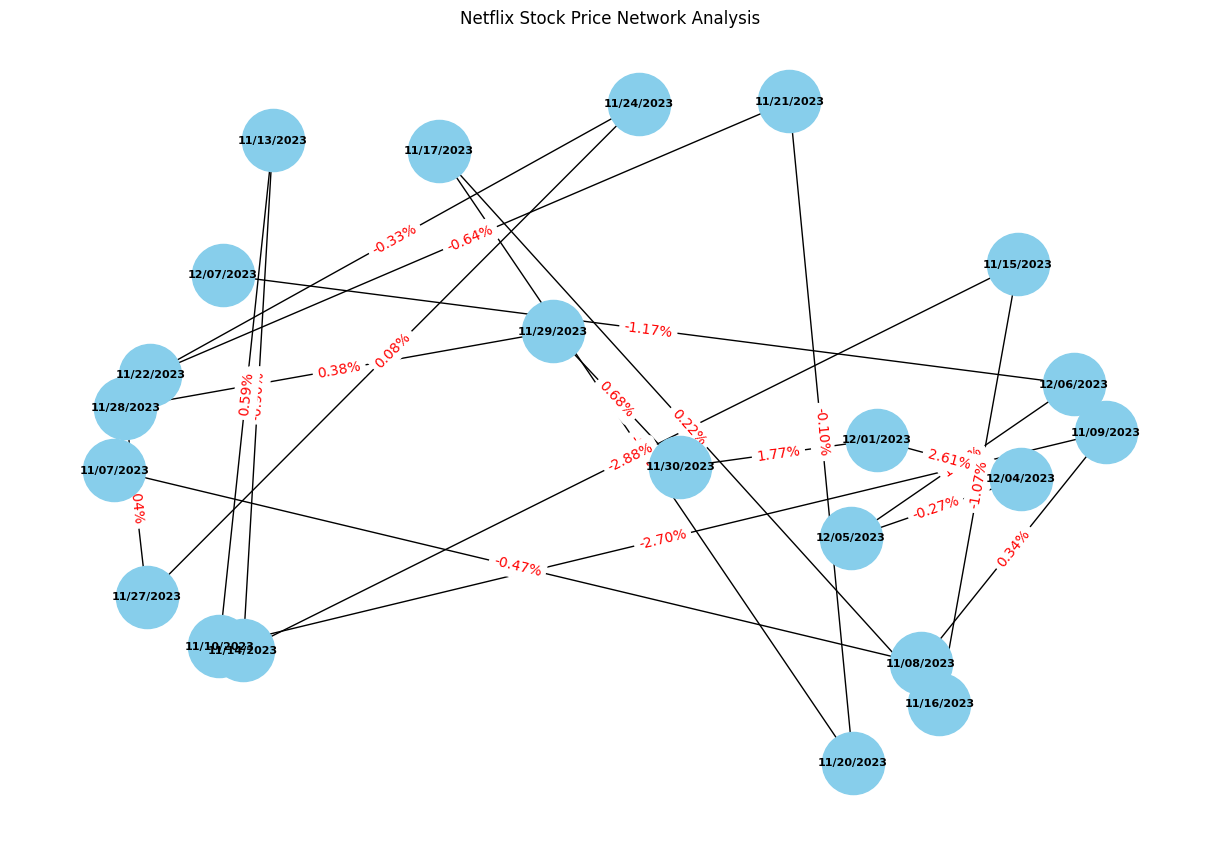

In [ ]:


# Create a graph using NetworkX
G = nx.Graph()

# Add nodes for each unique date in the DataFrame
nodes = df['Date'].unique()
G.add_nodes_from(nodes)


df['PriceChange'] = df['Close'].pct_change()
edges = list(zip(df['Date'][:-1], df['Date'][1:], df['PriceChange'][1:]))
G.add_weighted_edges_from(edges)

# Visualize the graph
pos = nx.spring_layout(G)  # You can use different layout algorithms
edge_labels = {(i, j): f"{weight:.2%}" for i, j, weight in edges}

plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=2000, node_color='skyblue', font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title('Netflix Stock Price Network Analysis')
plt.show()



In [ ]:
# Compute eigenvector centrality with adjusted parameters
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000, tol=1e-6)

# Identify top nodes based on eigenvector centrality
top_nodes_eigenvector = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)[:5]

print("Top 5 nodes based on eigenvector centrality:")
for node in top_nodes_eigenvector:
    print(f"Node: {node}, Eigenvector Centrality: {eigenvector_centrality[node]:.4f}")


Top 5 nodes based on eigenvector centrality:
Node: 11/21/2023, Eigenvector Centrality: 0.2942
Node: 11/22/2023, Eigenvector Centrality: 0.2942
Node: 11/24/2023, Eigenvector Centrality: 0.2887
Node: 11/20/2023, Eigenvector Centrality: 0.2887
Node: 11/27/2023, Eigenvector Centrality: 0.2778
